In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df= df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


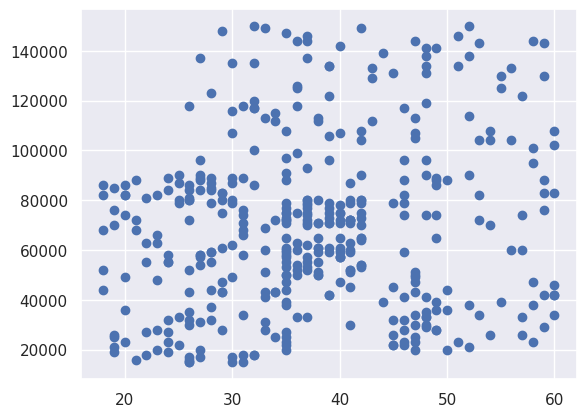

In [5]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.show()

In [6]:
x= df.iloc[:,0:2]
y=df.iloc[:,-1]

In [7]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [9]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=1)

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [11]:
model= Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history=model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 6s 37ms/step - loss: 7106.7803 - accuracy: 0.3469 - val_loss: 4783.1187 - val_accuracy: 0.4000
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 2479.2107 - accuracy: 0.3469 - val_loss: 66.7121 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 798.9750 - accuracy: 0.6531 - val_loss: 1044.7749 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 393.0185 - accuracy: 0.6281 - val_loss: 513.5130 - val_accuracy: 0.4000
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 268.4500 - accuracy: 0.4719 - val_loss: 190.8874 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 111.2270 - accuracy: 0.4969 - val_loss: 189.0701 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 129.6085 - accuracy: 0.5531 - val_loss: 66.3499 

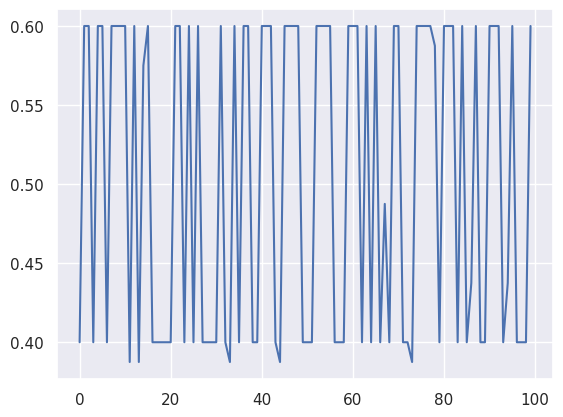

In [14]:
plt.plot(history.history['val_accuracy'])

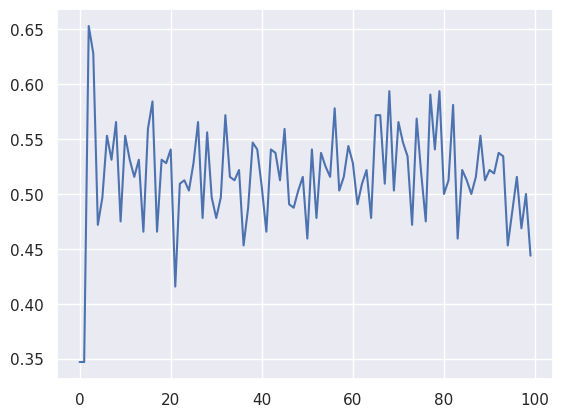

In [15]:
plt.plot(history.history['accuracy'])

**Feature scaling and Dropout**

In [16]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.fit_transform(x_test)

In [22]:
from tensorflow.keras.layers import Dropout

In [23]:
model1= Sequential()
model1.add(Dense(128, activation='relu', input_dim=2))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model1.fit(x_train_scaled, y_train, validation_data=(x_test_scaled,y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 24ms/step - loss: 0.6172 - accuracy: 0.7063 - val_loss: 0.5974 - val_accuracy: 0.8000
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5712 - accuracy: 0.7750 - val_loss: 0.5574 - val_accuracy: 0.8125
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5331 - accuracy: 0.8000 - val_loss: 0.5231 - val_accuracy: 0.8250
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4977 - accuracy: 0.8156 - val_loss: 0.4921 - val_accuracy: 0.8250
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4671 - accuracy: 0.8406 - val_loss: 0.4650 - val_accuracy: 0.8500
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4421 - accuracy: 0.8375 - val_loss: 0.4420 - val_accuracy: 0.8375
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4178 - accuracy: 0.8438 - val_loss: 0.4226 - val_accuracy: 0.8125
Epoch 8/100


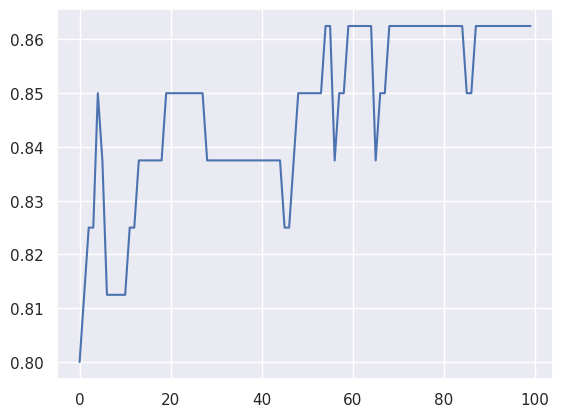

In [24]:
plt.plot(history.history['val_accuracy'])

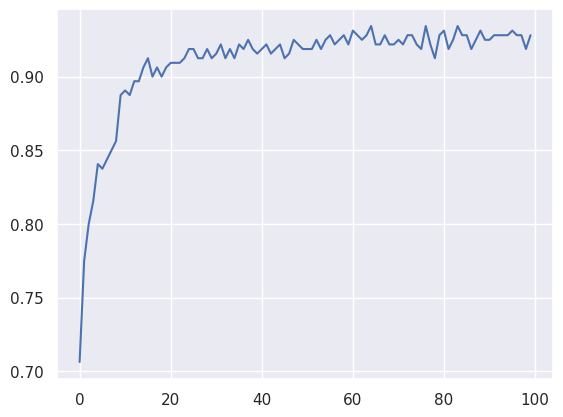

In [25]:
plt.plot(history.history['accuracy'])